In [2]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

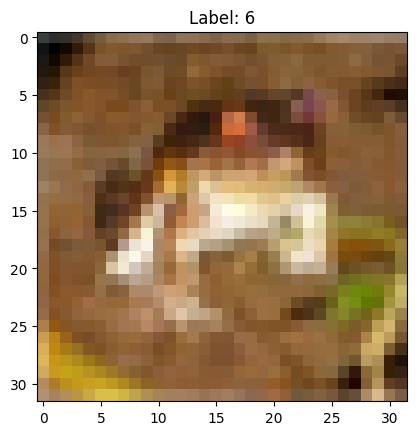

In [4]:
plt.imshow(x_train[0])
plt.title(f"Label: {y_train[0][0]}")
plt.show()

In [5]:
from tensorflow.keras.utils import to_categorical
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

In [6]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
print(y_train.shape, y_test.shape)
print(y_train[0])


(50000, 10) (10000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.2)


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - accuracy: 0.2702 - loss: 1.9421 - val_accuracy: 0.5033 - val_loss: 1.3817
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 51ms/step - accuracy: 0.4923 - loss: 1.4000 - val_accuracy: 0.5748 - val_loss: 1.1994
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.5573 - loss: 1.2497 - val_accuracy: 0.6075 - val_loss: 1.1379
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.6043 - loss: 1.1404 - val_accuracy: 0.6398 - val_loss: 1.0388
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.6305 - loss: 1.0599 - val_accuracy: 0.6549 - val_loss: 0.9840
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.6623 - loss: 0.9766 - val_accuracy: 0.6589 - val_loss: 0.9804
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.6812 - loss: 0.9222 - val_accuracy: 0.6696 - val_loss: 0.9530
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.6988 - loss: 0.8703 - 

In [15]:
import numpy as np
predictions = model.predict(x_test[:100])
predicted_classes = np.argmax(predictions, axis=1)
unique, counts = np.unique(predicted_classes, return_counts=True)
print(dict(zip(unique, counts)))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
{np.int64(0): np.int64(11), np.int64(1): np.int64(4), np.int64(2): np.int64(8), np.int64(3): np.int64(14), np.int64(4): np.int64(8), np.int64(5): np.int64(4), np.int64(6): np.int64(16), np.int64(7): np.int64(10), np.int64(8): np.int64(13), np.int64(9): np.int64(12)}


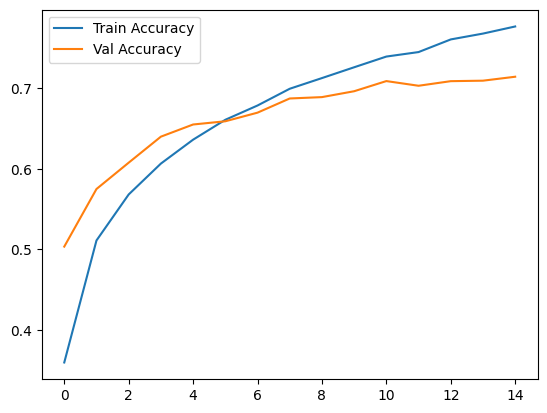

In [16]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


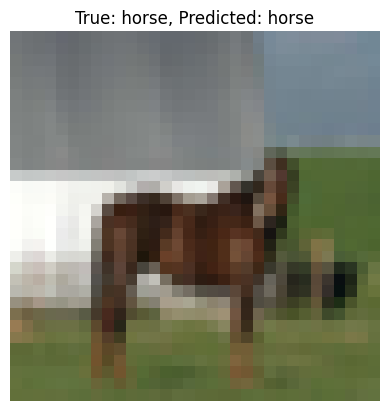

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


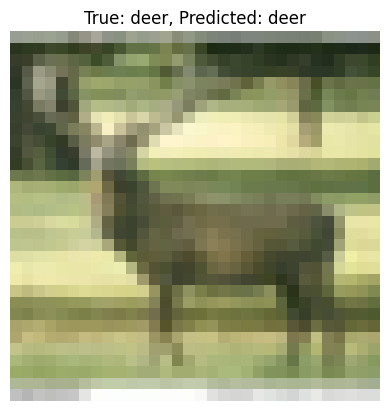

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


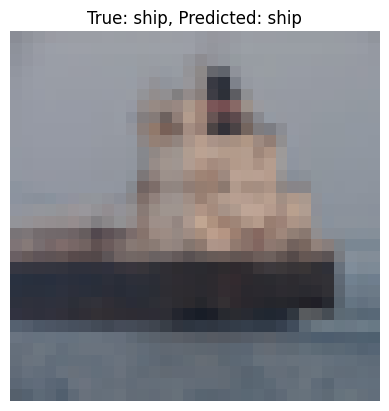

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


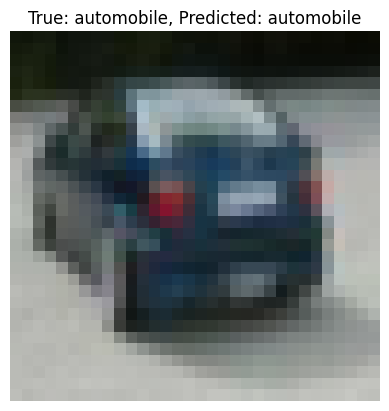

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


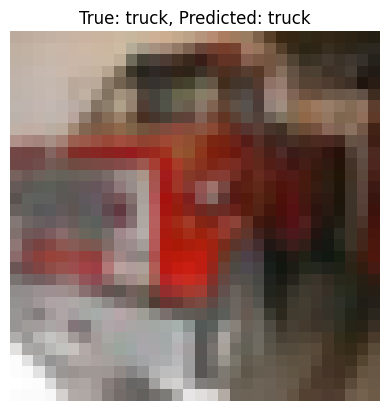

In [17]:
import numpy as np
import matplotlib.pyplot as plt

class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(5):
    index = np.random.randint(0, x_test.shape[0])
    image = x_test[index]
    true_label = int(np.argmax(y_test[index]))  # Ensuring it's int

    pred = model.predict(image.reshape(1, 32, 32, 3))
    predicted_label = int(np.argmax(pred))  # Ensuring it's int

    plt.imshow(image)
    plt.title(f"True: {class_labels[true_label]}, Predicted: {class_labels[predicted_label]}")
    plt.axis('off')
    plt.show()


In [18]:
import gradio as gr
import cv2
def predict_image(img):
    # Resize image to 32x32
    img = cv2.resize(img, (32, 32))
    img = img / 255.0
    img = img.reshape(1, 32, 32, 3)
    pred = model.predict(img)
    class_idx = np.argmax(pred)
    confidence = pred[0][class_idx]
    return {class_labels[i]: float(pred[0][i]) for i in range(10)}
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="numpy", label="Upload an Image (32x32 or any size)"),
    outputs=gr.Label(num_top_classes=3),
    live=False,
    title="CIFAR-10 Image Classifier",
    description="Upload an image and get the predicted class from the CIFAR-10 model."
)
interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c613eeb341ddf0c963.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
